<a href="https://colab.research.google.com/github/thiagolages/DCC831-deep-learning-algorithms/blob/master/AE_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aluno:Thiago Lages Rocha
# Matrícula: 2024709332

# 1) Encoder intuitivo #1

Considere um autoencoder em que o encoder é o seu cérebro. Cada exemplo é um conjunto de $n$ pontos $(x_1,y_1), \ldots, (x_{n}, y_{n})$ onde $n=1000$. Isto é, cada input é uma matriz $1000 \times 2$ de floats. Visualizando cada um dos $N$ exemplos disponíveis no seu conjunto de treinamento, você percebe que eles são da seguinte forma:



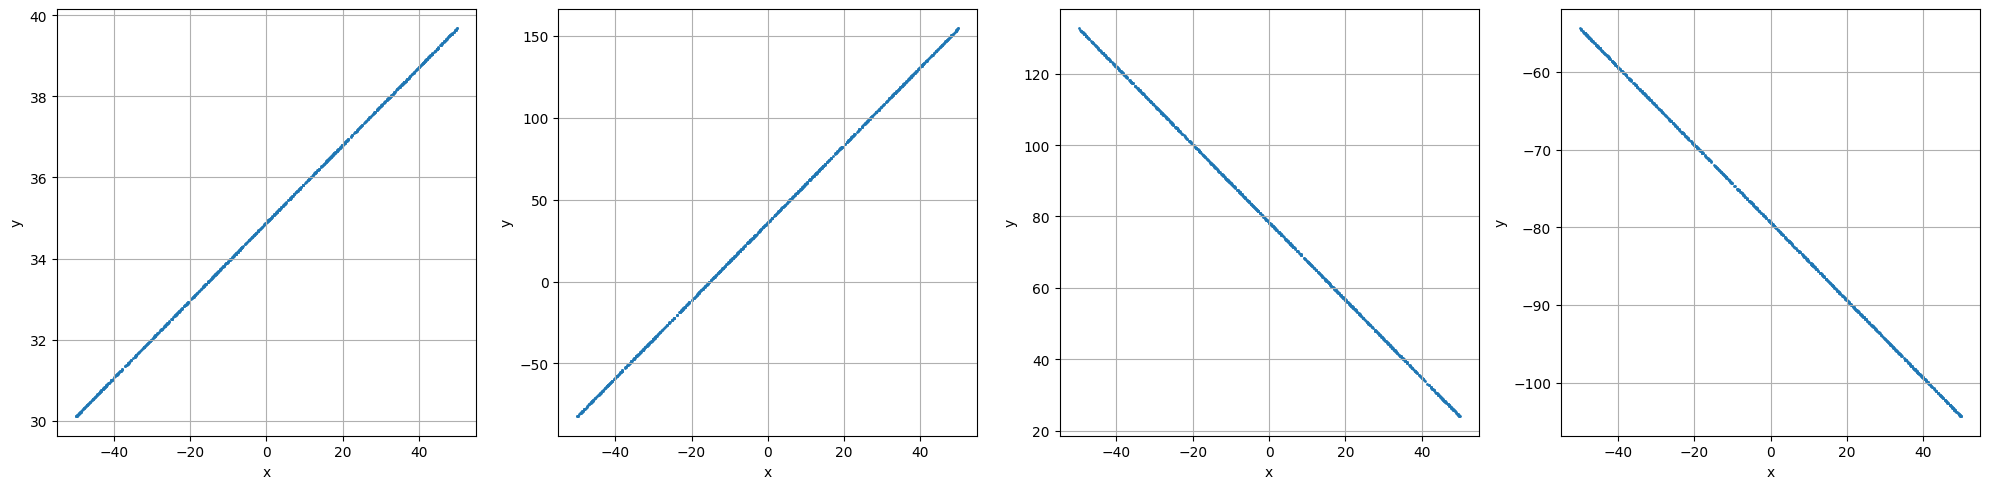

Sua tarefa é descrobrir a representação com a menor dimensão possível para codificar cada um dos exemplos. Qual seria esta representação?

# Resposta 1:
A menor representação possível para os dados mostrados acima deve utilizr um vetor de (2x1). Visto que cada um dos exemplos representa uma reta, é possível descrever o conjunto de dados com um valor A para a inclinação da reta, e um valor B para a interseção da reta com o eixo y. Dessa forma, cada entrada de (1000,2) pode ser representada por uma combinação de 2 números.

# 2) Encoder intuitivo #2

No problema anterior, os $N$ exemplos disponíveis possuem a mesma estrutura que os 4 exemplos smotrados abaixo. Qual seria a representação agora?

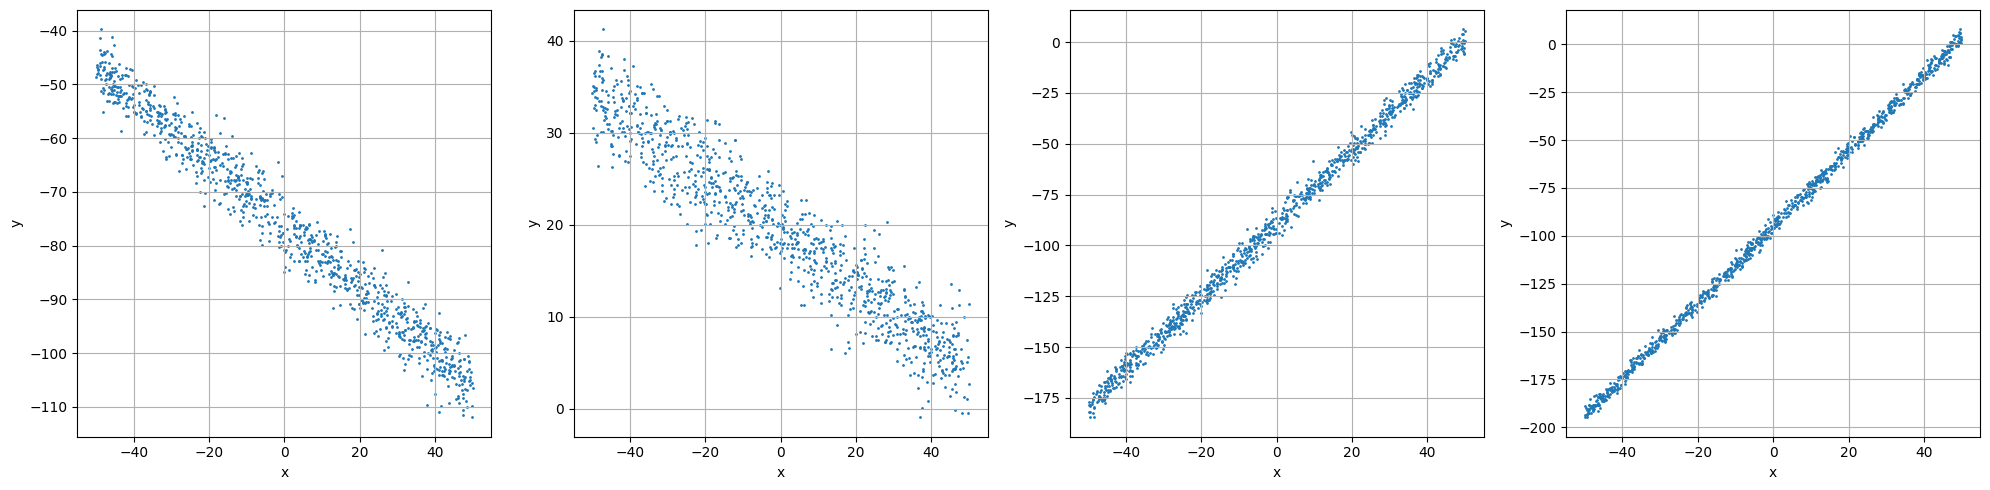

# Resposta 2:
Para o exemplo acima, além de 2 números para representar a inclinação e interseção da reta, devemos também ter uma codificação que consiga representar a variância dos dados em relação à reta descrita por 2 valores. Dessa forma, como temos dados que possuem variâncias menores (pontos mais pertos da reta) e maiores (pontos mais afastados da reta), devemos ter um valor adicional para esta representação, totalizando 3 números na representação (3x1).
Ao descrever os dados, teremos algo como `y = ax + b + norm(0,sigma)`, sendo `norm` uma distribuição normal, por exemplo, com média 0 e desvio padrão `sigma`.

# 3) Archimedean spiral

Here is a Python script that generates random points around an Archimedean spiral. You can read about this spiral in the web. When the points of the Archimedean spiral are represented in polar coordinates $(r, \theta)$, they have the form $(b \theta, \theta)$. That is, for a point with angle $\theta$, we have its radius given by $r(\theta) = b \theta$ where $b$ is a real positive constant. The angle is restricted to $(0, 5 * 2 \pi]$. This means that the spiral will roll over 5 times, approximately.

The random points are slightly displaced around this spiral. To do this, we add some random Gaussian noise to the radius:
$r(\theta) = b \theta + N(0,\sigma^2)$ where $\sigma$ is a small value representing the standard deviation of the noise:

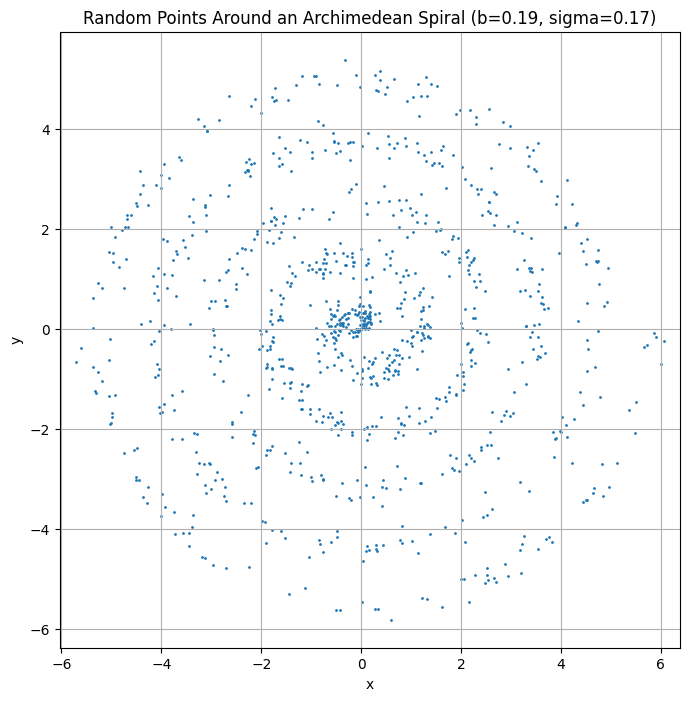

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_points(num_points):
    # Random constant b
    b = np.random.uniform(0.1, 1.0)
    # Standard deviation of the noise
    sigma = np.random.uniform(0.1, 0.3)

    # Generate random theta values between 0 and 5*2*pi
    theta = np.random.uniform(0, 10 * np.pi, num_points)

    # Generate the corresponding r values with noise
    r = b * theta + np.random.normal(0, sigma, num_points)

    # Convert polar coordinates to Cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return (x, y), (b, sigma)

# Call the function
num_points = 1000
(points, parameters) = generate_spiral_points(num_points)
x, y = points
b, sigma = parameters

# Plot the points
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=1)
plt.title(f'Random Points Around an Archimedean Spiral (b={b:.2f}, sigma={sigma:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()

Imagine that a large dataset is created where each example is a set of 1000 points $(x_i, y_i)$ generated from a call to generate_spiral_points(1000). An autoencoder must learn the most economical representation of each example. The decoder should be able to reproduce in the best way possible each example. What should be the dimension of the code? What is not possible or reasonable to be represented?

# Resposta 3:
Para representar cada exemplo de dado extraído da função `generate_spiral_points()`, é necessário que o autoencoder codifique:


1.   A constante `b`, que representa o raio da espiral para cada valor de ângulo `theta`;
2.   A variância `sigma`

Dimensão do vetor, portanto, seria de (2x1).

Não seria razoável tentar reproduzir fielmente o ruído presente nos dados, visto que é aleatório para cada amostra, e segue uma distribuição que pode ser representada por uma distribuição normal com média zero e desvio padrão sigma.





# 4) Denoising Autoencoder

Você deve modificar o notebook  05- AE Denoising.ipynb (código Keras).
Neste notebook colocamos um ruído não-estruturado, somando um ruído gaussiano $N(0, 0.25)$ em cada pixel. A ideia do exercício é que você crie um ruído **estruturado** imitando uma marca dágua. Escolha uma ou mais posições aleatórias na imagem. Em cada uma dessas posições (x,y), altere os pixels (x+i, y+j) onde 0 <= i <= 5 e 0 <= j <= 3. Os pixels alterados devem exibir algo tal como as suas iniciais ou algo similar (altere alguns dos pixels no retângulo para terem o valor 255 ou o valor 1, se já estiver padronizado). Vai ser legal se você criar uma marca criativa. Verifique se o denoising autoencoder consegue limpar as imagens das "marcas d'água".


# 5) Autoencoder com regularização

Você deve modificar o notebook  04-AE CNN with Regularization.ipynb (código Keras). Neste notebook, temos um autoencoder CNN usando a API funcional e com um code z de dimensão 20. Usamos uma regularização L1 nas coordenadas deste code z. Assim, a loss function é da forma

$$\mathcal{L} = \sum_i (\mathbf{x}_i - \hat{\mathbf{x}}_i)^2 + \lambda * \sum_i \sum_k |z_i(k)|$$

onde $\mathbf{z}_i = (z_i(1), z_i(2), \ldots, z_i(20))$ é a representação latente de $\mathbf{x}_i$ com um code de dimensão 20.

Usando o valor de lambda que eu especifiquei no código, o que eu quero é que você crie algumas poucas células de código para analisar quanto da loss function total é devido a cada um dos dois componenetes.